In [31]:
import pickle as pkl
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm


In [32]:
# os.chdir("../../../Desktop/GDrive/opto_data")
os.chdir("G:\My Drive\opto_data\\final")

In [3]:
import matplotlib
new_cmap = sns.color_palette("BuPu", as_cmap=True)
cols = [new_cmap(80), new_cmap(130), new_cmap(170), new_cmap(220)]
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams['font.size'] = "7"

In [33]:
# data = pkl.load(open("20sec_processed_optodata_24sep20.pkl", "rb"))
# data = pkl.load(open("20sec_processed_optodata_wexpnames_18nov20.pkl", "rb"))
data = pkl.load(open("20sec_processed_optodata_windexing_18jan21.pkl", "rb"))
# data = pkl.load(open("20sec_processed_optodata_windexing_20jan21.pkl", "rb"))


In [14]:
data['theta'].shape

(481505, 21)

In [16]:
data['theta'].shape

(481505, 22)

In [34]:
data['theta'].Experiment_block_key.unique()

array(['MonkeyG_20150915_Session2_S1', 'MonkeyG_20150915_Session3_S1',
       'MonkeyG_20150915_Session4_S1', 'MonkeyG_20150915_Session5_S1',
       'MonkeyG_20150916_Session4_S1', 'MonkeyG_20150917_Session1_S1',
       'MonkeyG_20150917_Session2_S1', 'MonkeyG_20150917_Session3_S1',
       'MonkeyG_20150921_Session3_S1', 'MonkeyG_20150921_Session5_S1',
       'MonkeyG_20150922_Session1_S1', 'MonkeyG_20150922_Session2_S1',
       'MonkeyG_20150922_Session3_S1', 'MonkeyG_20150925_Session1_S1',
       'MonkeyG_20150925_Session2_S1', 'MonkeyJ_20160426_Session1_S1',
       'MonkeyJ_20160426_Session2_S1', 'MonkeyJ_20160426_Session3_S1',
       'MonkeyJ_20160428_Session2_S1', 'MonkeyJ_20160428_Session3_S1',
       'MonkeyJ_20160429_Session1_S1', 'MonkeyJ_20160429_Session3_S1',
       'MonkeyJ_20160502_Session1_S1', 'MonkeyJ_20160624_Session3_S1',
       'MonkeyJ_20160624_Session4_S1', 'MonkeyJ_20160625_Session4_S1',
       'MonkeyJ_20160625_Session5_S1', 'MonkeyJ_20160627_Session1_S1',
      

In [22]:
data['theta'].shape

(481505, 25)

In [23]:
len(data['theta'].Experiment_block_key.unique())

33

In [29]:
data["theta"].columns

Index(['index', 'Initial_coh', 'Distance', 'Coh_proj', 'Phase',
       'Pair_avg_net_coh', 'Elec_cov', 'Time_cov', 'Avg_coh_to_stim',
       'Monkeys', 'Block_num', 'Delays', 'Both_M1', 'Both_S1',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further', 'Coh_diff_mag',
       'End_diff', 'cond_diff_Y', 'diff_Y', 'Experiment_block_key',
       'From_electrodes', 'To_electrodes'],
      dtype='object')

In [25]:
data['theta'].shape

(481505, 27)

In [26]:
len(data['theta'].Experiment_block_key.unique())

33

In [27]:
data["theta"].columns

Index(['index', 'Initial_coh', 'Distance', 'Coh_proj', 'Phase',
       'Pair_avg_net_coh', 'Elec_cov', 'Time_cov', 'Avg_coh_to_stim',
       'Monkeys', 'Block_num', 'Delays', 'Both_M1', 'Both_S1',
       'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further', 'Coh_diff_mag',
       'End_diff', 'cond_diff_Y', 'diff_Y', 'Experiment_block_key',
       'From_electrodes', 'To_electrodes', 'Is_stim_site_1', 'Is_stim_site_2'],
      dtype='object')

In [6]:
# Get only stim-site data
local_data = {}
for band in data.keys():
#     local_data[band] = data[band][(data[band]["Is_stim_site_1"] == 1) & (data[band]["Is_stim_site_2"] == 1)]
    local_data[band] = data[band][(data[band]["Las1_distance_to_closer"] == 0) & (data[band]["Las2_distance_to_closer"] == 0)].copy()

In [7]:
local_data["theta"]

Initial_coh  Distance  Coh_proj     Phase  Pair_avg_net_coh  \
494626      0.976508  8.246211  0.685750  0.004752          1.576573   
502195      0.928264  8.246211  0.477935  0.020460          1.241653   
509764      0.954063  8.246211  0.480893  0.047185          1.206834   
517333      0.961285  8.246211  0.477119  0.037981          1.236702   
524902      0.968573  8.246211  0.579720  0.025483          1.435331   
...              ...       ...       ...       ...               ...   
1605775     0.223528  3.000000  0.086499  0.278686          0.559177   
1608479     0.240047  3.000000  0.084474  0.509468          0.535236   
1611183     0.224411  3.000000  0.070564  0.342308          0.485608   
1613887     0.258493  3.000000  0.062755  0.011198          0.447123   
1616591     0.242170  3.000000  0.060138  0.098700          0.434410   

         Elec_cov  Time_cov  Avg_coh_to_stim Monkeys  Block_num  ...  Both_M1  \
494626   0.057129  0.016812         0.988254       G        1.0  ...      1.0   
502195   0.082372  0.019244         0.964132       G        2.0  ...      1.0   
509764   0.116615  0.007312         0.977032       G        3.0  ...      1.0   
517333   0.092439  0.020320         0.980643       G        4.0  ...      1.0   
524902   0.061181  0.013434         0.984286       G        5.0  ...      1.0   
...           ...       ...              ...     ...        ...  ...      ...   
1605775  0.009411  0.000817         0.611764       J        1.0  ...      0.0   
1608479  0.013900  0.001368         0.620024       J        2.0  ...      0.0   
1611183  0.013392  0.000798         0.612206       J        3.0  ...      0.0   
1613887  0.014647  0.000993         0.629247       J        4.0  ...      0.0   
1616591  0.013487  0.001523         0.621085       J        5.0  ...      0.0   

         Both_S1  Las1_distance_to_closer  Las1_distance_to_further  \
494626       0.0                      0.0                  8.246211   
502195       0.0                      0.0                  8.246211   
509764       0.0                      0.0                  8.246211   
517333       0.0                      0.0                  8.246211   
524902       0.0                      0.0                  8.246211   
...          ...                      ...                       ...   
1605775      1.0                      0.0                  3.000000   
1608479      1.0                      0.0                  3.000000   
1611183      1.0                      0.0                  3.000000   
1613887      1.0                      0.0                  3.000000   
1616591      1.0                      0.0                  3.000000   

         Las2_distance_to_closer  Las2_distance_to_further  Coh_diff_mag  \
494626                       0.0                  8.246211      0.030421   
502195                       0.0                  8.246211      0.055215   
509764                       0.0                  8.246211      0.036374   
517333                       0.0                  8.246211      0.033085   
524902                       0.0                  8.246211      0.032941   
...                          ...                       ...           ...   
1605775                      0.0                  3.000000      0.209019   
1608479                      0.0                  3.000000      0.183693   
1611183                      0.0                  3.000000      0.163349   
1613887                      0.0                  3.000000      0.150140   
1616591                      0.0                  3.000000      0.138699   

         End_diff  cond_diff_Y    diff_Y  
494626  -0.018612    -0.003989 -0.048244  
502195   0.029633     0.035673  0.025799  
509764   0.003834     0.006287  0.007222  
517333  -0.003388     0.032180  0.007288  
524902  -0.010676     0.010307 -0.010676  
...           ...          ...       ...  
1605775 -0.012387    -0.001286  0.016520  
1608479 -0.028906    -0.022010 -0.015636  
1611183 -0.013270 

In [8]:
first_data = {}
# first_cdata = {}
first_local_data = {}

for band in data.keys():
    first_data[band] = data[band][data[band]["Block_num"] == 1]
#     first_cdata[band] = cdata[band][cdata[band]["Block_num"] == 1]
    first_local_data[band] = local_data[band][local_data[band]["Block_num"] == 1]

In [9]:
pandas.set_option('display.max_columns', None)


In [10]:
os.chdir("D:/gdrive/GDocuments/Nature_biomed/figures")

In [11]:
local_data["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Phase', 'Pair_avg_net_coh',
       'Elec_cov', 'Time_cov', 'Avg_coh_to_stim', 'Monkeys', 'Block_num',
       'Delays', 'Both_M1', 'Both_S1', 'Las1_distance_to_closer',
       'Las1_distance_to_further', 'Las2_distance_to_closer',
       'Las2_distance_to_further', 'Coh_diff_mag', 'End_diff', 'cond_diff_Y',
       'diff_Y'],
      dtype='object')

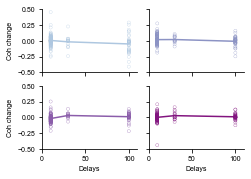

In [12]:
# As categorical
# changes with only delay, categorical

i=0
fig, axs = plt.subplots(2, 2, figsize=(3.5, 2.5), sharex=True, sharey=True)

for band in data.keys():#
    data[band]['abs_cond_diff_Y'] = np.abs(data[band]['cond_diff_Y'])
    local_data[band]['abs_cond_diff_Y'] = np.abs(local_data[band]['cond_diff_Y'])
    
    formula_all_wholesess = "cond_diff_Y ~ C(Delays)"    
    mod2 = ols(formula=formula_all_wholesess, data=local_data[band])
    res1 = mod2.fit()
#     sns.scatterplot(x="Delays", y="cond_diff_Y", data=local_data[band], ax=axs[i//2, i%2], alpha=.3, linewidth=0, color="black")#, s=20)
    
    sns.scatterplot(x="Delays", y="cond_diff_Y", data=local_data[band], alpha=1, ax=axs[i//2, i%2], facecolors='none', edgecolor=cols[i], s=10)

    axs[i//2, i%2].plot([10, 30, 100], res1.predict(pandas.DataFrame({"Delays": [10, 30, 100]})), color=cols[i])
    axs[i//2, i%2].set_ylabel("Coh change")
#     axs[i//2, i%2].text(40, .3, "r2: "+"{:1.3f}".format(res1.rsquared), fontsize=12)
#     axs[i//2, i%2].text(40, .15, "p: "+"{:1.3f}".format(res1.f_pvalue), fontsize=12)
    
#     axs[i//2, i%2].set_title(band)
    axs[i//2, i%2].set_ylim([-.5, .5])
    axs[i//2, i%2].set_xlim([0, 110])

    # Hide the right and top spines
    axs[i//2, i%2].spines['right'].set_visible(False)
    axs[i//2, i%2].spines['top'].set_visible(False)
    
    i +=1
    
plt.tight_layout()
# plt.savefig("delay_cond_local_preds.pdf")

In [14]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cond_diff_Y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.446
Date:                Tue, 04 May 2021   Prob (F-statistic):              0.239
Time:                        18:21:17   Log-Likelihood:                 231.45
No. Observations:                 165   AIC:                            -456.9
Df Residuals:                     162   BIC:                            -447.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0001      0.006      0.026      0.980      -0.011       0.011
C(Delays)[T.30.0]      0.0269      0.017      1.626      0.106      -0.006       0.060
C(Delays)[T.100.0]     0.0087      0.011      0.780      0.436      -0.013       0.031
==============================================================================
Omnibus:                      112.428   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.651
Skew:                          -2.047   Prob(JB):                         0.00
Kurtosis:                      20.715   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
break

SyntaxError: 'break' outside loop (<ipython-input-13-6aaf1f276005>, line 1)

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use('seaborn-colorblind')

In [ ]:
# # As linear
# # Whole session changes with only delay, categorical

# for band in data.keys():# ["high_gamma"]:#
#     print(band)
#     fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

#     formula_all_wholesess = "abs_diff_Y ~ Delays"    
#     mod2 = ols(formula=formula_all_wholesess, data=local_data[band])
#     res1 = mod2.fit()
#     sns.scatterplot(x="Delays", y="abs_diff_Y", data=local_data[band], ax=axs[0], alpha=.6)
#     axs[0].plot([10, 30, 100], res1.predict(pandas.DataFrame({"Delays": [10, 30, 100]})), color="red")
#     axs[0].set_ylabel("Coh change")
#     axs[0].text(50, .4/2, "r2: "+str(res1.rsquared), fontsize=12)
#     axs[0].text(50, .4/2/2, "p: "+str(res1.f_pvalue), fontsize=12)
#     axs[0].set_title("Delay-based prediction of coherence changes between stim sites")
#     print(res1.f_pvalue)
    

#     formula_all_wholesess = "abs_diff_Y ~ Delays"    
#     mod2 = ols(formula=formula_all_wholesess, data=data[band])
#     res2 = mod2.fit()
#     sns.scatterplot(x="Delays", y="abs_diff_Y", data=data[band], ax=axs[1], alpha=.05)
#     axs[1].plot([10, 30, 100], res2.predict(pandas.DataFrame({"Delays": [10, 30, 100]})), color="red")
#     axs[1].set_ylabel("Coh change")
#     axs[1].text(50, .4, "r2: "+str(res2.rsquared), fontsize=12)
#     axs[1].text(50, .4/2, "p: "+str(res2.f_pvalue), fontsize=12)
#     axs[1].set_title("Delay-based prediction of coherence changes between all sites")

    
# #     plt.savefig("figs/delay_hg_plot.png", dpi=100)
#     plt.show()
# #     print(res1.rsquared)
# #     print(res1.mse_total)
# #     print(res1.f_pvalue)


In [ ]:
# # As STDP
# # Whole session changes with only delay, categorical

# for band in data.keys():# ["high_gamma"]:#
#     print(band)
#     fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
    
#     data[band]['Delays_transformed'] = np.exp(-data[band]['Delays']/10)
#     local_data[band]['Delays_transformed'] = np.exp(-local_data[band]['Delays']/10)

#     formula_all_wholesess = "abs_diff_Y ~ Delays_transformed + 1"    
#     mod2 = ols(formula=formula_all_wholesess, data=local_data[band])
#     res1 = mod2.fit()
# #     sns.scatterplot(x="Delays", y="abs_diff_Y", data=local_data[band], ax=axs[0], alpha=.6)
#     axs[0].plot([10, 30, 100], res1.predict(pandas.DataFrame({"Delays_transformed": np.exp(-np.asarray([10, 30, 100])/10)})), color="red")
#     axs[0].set_ylabel("Coh change")
# #     axs[0].text(50, .4/2, "r2: "+str(res1.rsquared), fontsize=12)
# #     axs[0].text(50, .4/2/2, "p: "+str(res1.f_pvalue), fontsize=12)
#     axs[0].set_title("Delay-based prediction of coherence changes between stim sites")
#     print(res1.f_pvalue)
    

#     formula_all_wholesess = "abs_diff_Y ~ Delays_transformed + 1"    
#     mod2 = ols(formula=formula_all_wholesess, data=data[band])
#     res2 = mod2.fit()
# #     sns.scatterplot(x="Delays", y="abs_diff_Y", data=data[band], ax=axs[1], alpha=.05)
#     axs[1].plot([10, 30, 100], res2.predict(pandas.DataFrame({"Delays_transformed": np.exp(-np.asarray([10, 30, 100])/10)})), color="red")
#     axs[1].set_ylabel("Coh change")
# #     axs[1].text(50, .4, "r2: "+str(res2.rsquared), fontsize=12)
# #     axs[1].text(50, .4/2, "p: "+str(res2.f_pvalue), fontsize=12)
#     axs[1].set_title("Delay-based prediction of coherence changes between all sites")

    
# #     plt.savefig("figs/delay_hg_plot.png", dpi=100)
#     plt.show()
# #     print(res1.rsquared)
# #     print(res1.mse_total)
# #     print(res1.f_pvalue)


In [ ]:
data["theta"].columns

In [ ]:
for band in data.keys():
    
    data[band]['abs_cond_diff_Y'] = np.abs(data[band]['cond_diff_Y'])
    local_data[band]['abs_cond_diff_Y'] = np.abs(local_data[band]['cond_diff_Y'])
    
    formula_1 = "cond_diff_Y ~ C(Delays)"    
    formula_2 = "cond_diff_Y ~ C(Delays) + Distance"
    
    res1 = ols(formula=formula_1, data=local_data[band]).fit()
#     res2 = ols(formula=formula_2, data=local_data[band]).fit()
    
    print(band)
    print(res1.rsquared)
    print(res1.f_pvalue)
#     print(anova_lm(res1, res2))
    print()
    


# Control model

In [ ]:
# All data, by block
# All features
# control
# during stim

for band in data.keys():
    print(band)
    r2s = []
    formula_all_block = "cond_diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_mag + \
    Coh_proj + Graph_avg_net_coh" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_block, data=cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, by block
# All features
# control
# baseline to baseline

for band in data.keys():
    print(band)
    r2s = []
    formula_all_block = "cond_diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_mag + \
    Coh_proj + Graph_avg_net_coh" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_block, data=cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

# General effect of stim

In [ ]:
#comparison of deltas
for band in data.keys():
    print(band)
    print(stats.ttest_ind(cdata[band]["cond_diff_Y"], data[band]["cond_diff_Y"], equal_var=False))
    print(data[band]["cond_diff_Y"].mean() - cdata[band]["cond_diff_Y"].mean())
    print(data[band]["cond_diff_Y"].mean())

    # whether abs change is different
    print(stats.ttest_ind(np.abs(cdata[band]["cond_diff_Y"]), np.abs(data[band]["cond_diff_Y"]), equal_var=False))
    print(np.abs(data[band]["cond_diff_Y"]).mean() - np.abs(cdata[band]["cond_diff_Y"]).mean())
#     print(data[band]["cond_diff_Y"].mean())

    # whether abs change is different
    print(stats.ttest_ind(np.abs(cdata[band]["diff_Y"]), np.abs(data[band]["diff_Y"]), equal_var=False))
    print(np.abs(data[band]["diff_Y"]).mean() - np.abs(cdata[band]["diff_Y"]).mean())
#     print(data[band]["cond_diff_Y"].mean())
    
#     plt.figure(figsize=(10, 10))
#     sns.violinplot("band", "diff_Y", "stim", all_data, split=True, inner="quartile")
#     plt.title(band)
#     plt.show()
    
    print(stats.ttest_ind(cdata[band]["diff_Y"], data[band]["diff_Y"], equal_var=False))
    print(data[band]["diff_Y"].mean() - cdata[band]["diff_Y"].mean())
    print((data[band]["diff_Y"].mean()))
      
    print(stats.ttest_ind(first_cdata[band]["End_diff"], first_data[band]["End_diff"], equal_var=False))
    print(first_data[band]["End_diff"].mean() - first_cdata[band]["End_diff"].mean())
    print(first_data[band]["End_diff"].mean())
          
    # get average change per session
    print(stats.ttest_ind(list(data[band].groupby("Experiment_block_key")["diff_Y"].mean()), 
                          cdata[band].groupby("Experiment_block_key")["diff_Y"].mean(), equal_var=False))
    print(data[band].groupby("Experiment_block_key")["diff_Y"].mean().mean() -
                          cdata[band].groupby("Experiment_block_key")["diff_Y"].mean().mean())
    print(data[band].groupby("Experiment_block_key")["diff_Y"].mean().mean())
          
    print()

# Whole-network model
Replicate these analyses with nonlinear modeling

In [ ]:
# All data, with block interaction
# All features
# stim

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ Block_num * (Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further  + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Time_cov + Avg_coh_to_stim + \
    Coh_proj + Coh_diff_mag)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, without block interaction
# All features
# stim

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ (Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further  + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Time_cov + Avg_coh_to_stim + \
    Coh_proj + Coh_diff_mag)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# only subject

for band in data.keys():
    print(band)
    formula_subj = "diff_Y ~ Monkeys"
    mod1 = ols(formula=formula_subj, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, without block interaction
# All features
# diff

for band in data.keys():
    print(band)
    formula_all_blockinteract = "diff_Y ~ (Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further  + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Time_cov + Avg_coh_to_stim + \
    Coh_proj + Coh_diff_mag)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data
# Protocol features
# stim

for band in data.keys():
    print(band)
    formula_protocol = "cond_diff_Y ~ (Block_num + Distance + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further)"
    mod1 = ols(formula=formula_protocol, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# # All data, by block
# # All features
# # whole session

# for band in data.keys():
#     print(band)
#     formula_all_blockinteract = "End_diff ~ (Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
#     Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further  + \
#     Initial_coh + Pair_avg_net_coh  + Elec_cov + \
#     Coh_proj + Coh_diff_mag + Graph_avg_net_coh)"
#     mod1 = ols(formula=formula_all_blockinteract, data=first_data[band])
#     res1 = mod1.fit()
#     print(res1.rsquared)

In [ ]:
# All data, by block
# No protocol
# stim
# cond diff

for band in data.keys():
    print(band)
    r2s = []
    experiments = data[band]["Experiment_block_key"].unique()

    for i in range(200):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = data[band][data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "cond_diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj + Graph_avg_net_coh"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


In [ ]:
# All data, by block
# No protocol
# stim
# diff

for band in data.keys():
    print(band)
    r2s = []
    experiments = data[band]["Experiment_block_key"].unique()

    for i in range(200):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = data[band][data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "diff_Y ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj + Graph_avg_net_coh"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


# With block interactions

In [ ]:
# All data, by block
# All features
# control
# during stim

for band in data.keys():
    print(band)
    r2s = []
    formula_all_block = "cond_diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_mag + \
    Coh_proj)" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_block, data=cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, by block
# All features
# control
# after stim

for band in data.keys():
    print(band)
    r2s = []
    formula_all_block = "diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_mag + \
    Coh_proj)" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_block, data=cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, by block
# All features
# stim
# after stim

for band in data.keys():
    print(band)
    r2s = []
    formula_all_block = "diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + Distance + Coh_diff_avg + \
    Coh_proj)" # plus connectivity difference, time covariance...
    mod1 = ols(formula=formula_all_block, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, by block interact
# No protocol
# stim
# cond diff

for band in data.keys():
    print(band)
    r2s = []
    experiments = data[band]["Experiment_block_key"].unique()

    for i in range(100):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = data[band][data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "cond_diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj)"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


In [ ]:
# All data, by block interact
# No protocol
# stim
# diff

for band in data.keys():
    print(band)
    r2s = []
    experiments = data[band]["Experiment_block_key"].unique()

    for i in range(100):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = data[band][data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "diff_Y ~ Block_num * (Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj)"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


# Whole session

In [ ]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Coh_diff_mag"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
first_data["theta"].head()

In [ ]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Coh_diff_mag + Time_cov"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
data["theta"][[data["theta"].isna()]]

In [ ]:
# All data, by block interact
# No protocol
# stim
# end diff

for band in data.keys():
    print(band)
    r2s = []
    experiments = first_data[band]["Experiment_block_key"].unique()

    for i in range(100):
        sample_experiments = experiments[np.random.choice(24, 4, replace=False)]
        sample_experiments_data = first_data[band][first_data[band]["Experiment_block_key"].isin(sample_experiments)]
        
        formula_all_blockinteract = "End_diff ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj"
        mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
        res1 = mod1.fit()
#         print(res1.rsquared)
        r2s.append(res1.rsquared)
    print(np.mean(r2s))


In [ ]:
# All data, whole-session changes
# All features
# Control

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Coh_diff_mag"
    mod1 = ols(formula=formula_all_wholesess, data=first_cdata[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
stims_for_compare = list(data["theta"]["Experiment_block_key"].unique()[:12])+list(data["theta"]["Experiment_block_key"].unique()[-12:])
repr_data = {}
for band in data.keys():
    repr_data[band] = first_data[band][first_data[band]["Experiment_block_key"].isin(stims_for_compare)]

In [ ]:
data["theta"]["Experiment_block_key"].unique()

In [ ]:
# All data, whole session change
# smart subsampling
# No protocol
# stim
# end diff
import itertools 

all_r2s = []

for band in data.keys():
    print(band)
    r2s = []
    
    experiments = repr_data[band]["Experiment_block_key"].unique()

    for i, j in itertools.combinations(range(4), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "End_diff ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    
    for i, j in itertools.combinations(range(4, 8), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "End_diff ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    for i, j in itertools.combinations(range(8, 12), 2):
        for k in range(12, 23):
            l = k+1
            
            sample_experiments = experiments[[i, j, k, l]]
            sample_experiments_data = repr_data[band][repr_data[band]["Experiment_block_key"].isin(sample_experiments)]
            formula_all_blockinteract = "End_diff ~ Block_num + Phase + Monkeys + Both_M1 + Both_S1 + \
        Initial_coh + Pair_avg_net_coh  + Elec_cov + Coh_diff_avg + \
        Coh_proj"
            mod1 = ols(formula=formula_all_blockinteract, data=sample_experiments_data)
            res1 = mod1.fit()
            r2s.append(res1.rsquared)
    print(np.mean(r2s))
    all_r2s.append(r2s)


In [ ]:
# All data, whole-session changes
# All features

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, whole-session changes
# Only graph

for band in data.keys():
    print(band)
    formula_all_wholesess = "End_diff ~ Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Time_cov + Coh_proj + Graph_avg_net_coh + Coh_diff_avg + Avg_stim_diff_btw_elec"
    mod1 = ols(formula=formula_all_wholesess, data=first_data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, all single-block changes
# Only protocol

for band in data.keys():
    print(band)
    formula_all = "diff_Y ~ Distance + Phase + Delays + Monkeys + Block_num + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further"
    mod1 = ols(formula=formula_all, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)
#     print(res1.f_pvalue)

In [ ]:
# All data, with block interaction
# All features

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ (Block_num + Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Graph_avg_net_coh + Coh_diff_avg)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)

In [ ]:
# All data, with block interaction
# All features

for band in data.keys():
    print(band)
    formula_all_blockinteract = "cond_diff_Y ~ Block_num * (Distance + Phase + Delays + Monkeys + Both_M1 + Both_S1 + \
    Las1_distance_to_closer + Las1_distance_to_further + Las2_distance_to_closer + Las2_distance_to_further + \
    Initial_coh + Pair_avg_net_coh  + Elec_cov + \
    Coh_proj + Graph_avg_net_coh + Coh_diff_avg)"
    mod1 = ols(formula=formula_all_blockinteract, data=data[band])
    res1 = mod1.fit()
    print(res1.rsquared)